# Homework 1
- This homework is a "warm up" - it is NOT graded, but you must submit it
- The primary goal is to get anaconda and jupyter setup and running so you can experiment, and be ready for homework 2, which is a real, graded one
- Subsequent homeworks will be in a format like this one
- The jupyter notebook file you upload to Courseworks2 must be named 'YourUNI.ipynb' - just rename the notebook you downloaded, and add cells with your work in them
- Submit the notebook on Courseworks2 by 5:50pm Wed Sept 12
- If you having trouble getting setup, ask for help on piazza

# Tasks
- Install the [Anaconda](https://www.anaconda.com/download/) distribution on your machine
- Try running the notebook server
    - start a terminal/shell/command window
    - cd to the directory containing the two Homework 1 files you downloaded
    - start the notebook server by typing 'jupyter-notebook' 
    - in a browser, goto 'localhost:8888' - you should get a list of files
    in the directory. double click on 'w1-Homework.ipynb'
    - be sure to evaluate the cell below this one to confirm your installation completec correctly
    - click on Help/User Interface Tour
    - click on Help/Keyboard Shortcuts
    - learn how to navigate cells, enter python expressions, and evaluate them
- Look at the problems below
    - Try doing some or all of them in the notebook
    - If you can't do them, do not worry. Just give them some thought
    - I will go over the problems in class

In [1]:
# a line that starts with '#' is a comment, and ignored by python

# the output of this cell should include something like:

# 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
# [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]

# if you don't see this, something went wrong with your install

import sys

sys.version

'3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
# you MUST evaluate this cell, or the code below will not work

import math
import random


# Hints for the problems
- function definition is described in the w1-06-classes notebook

In [3]:
# math functions, pi constant

[math.sqrt(4), math.sin(math.pi/2), math.cos(math.pi/4)]

[2.0, 1.0, 0.7071067811865476]

In [4]:
# abs value function

[abs(4), abs(-4)]

[4, 4]

In [5]:
# represent a two dimensional point as a list [x,y]

pt = [3,4]

# instead of this

xcord = pt[0]
ycord = pt[1]

# can use destructuring...

xcord, ycord = pt

[xcord, ycord]


[3, 4]

# Problems

# define function circlePoints(n)
- represent a 2D point as a list - [x,y]
- origin is [0,0]
- generates a list of n evenly spaced points on a circle of radius=1 centered at the origin
- points can be viewed as the vertexes of a regular n side polygon(n-gon)
- note that due to floating point round off errors, zero is often represented by very small numbers, like 1e-16

In [6]:
def circlePoints(n):
    ans = []
    for j in range(n):
        ang = j * 2 * math.pi / n
        ans.append([math.cos(ang), math.sin(ang)])
    return ans

In [7]:
# pts are really [[1,0],[0,1],[-1,0],[0,-1]]

circlePoints(4)

[[1.0, 0.0],
 [6.123233995736766e-17, 1.0],
 [-1.0, 1.2246467991473532e-16],
 [-1.8369701987210297e-16, -1.0]]

In [8]:
# define 'chop' function to change tiny floats to 0.0

def chop(x):
    if abs(x) < 1e-14:
        return 0.0
    else:
        return x

chop(1.2246467991473532e-16)

0.0

In [9]:
# clean up output 

[[chop(x), chop(y)] for [x,y] in circlePoints(4)]

[[1.0, 0.0], [0.0, 1.0], [-1.0, 0.0], [0.0, -1.0]]

# Distance computations
- define function 'euclid' that computes the straight line distance between two points
- define function 'manhattan' that computes the 'manhattan' distance(can only move horizontally or vertically) between two points


In [10]:
def euclid(pt1, pt2):
    # could do
    x1 = pt1[0]
    y1 = pt1[1]
    # but destructuring is much nicer
    x1,y1 = pt1
    x2,y2 = pt2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def manhattan(pt1, pt2):
    x1,y1 = pt1
    x2,y2 = pt2
    return abs(x1-x2)+abs(y1-y2)

In [11]:
pt1 = [0,0]
pt2 = [3,4]

euclid(pt1, pt2)

5.0

In [12]:
manhattan(pt1, pt2)

7

# define function sumPoints
- computes the x sum and the y sum of a list of points
- use chop on the sums

In [13]:
def sumPoints(points):
    xsum = 0
    ysum = 0
    # destructure x,y in for loop
    for x,y in points:
        xsum += x
        ysum += y
    return [chop(xsum), chop(ysum)]

In [14]:
sumPoints([[2,3],[3,4],[10,20]])

[15, 27]

In [15]:
# try running sumPoints on some n-gons from circlePoints
# the output is really [0,0], but remember floating point roundoff

sumPoints(circlePoints(4))

[0.0, 0.0]

In [16]:
p8 = circlePoints(8)
sumPoints(p8)

[0.0, 0.0]

In [17]:
# it seems like for even n, the points always sum to [0,0]
# a simple symmetry argument proves this...

p64 = circlePoints(64)
sumPoints(p64)

[0.0, 0.0]

In [18]:
import matplotlib.pyplot as plt

# make plots render in the notebook, instead of in an external window,
# which tends to be annoying

%matplotlib inline

# plotting will be explained in detail later on

def plotpts(pts):
    xpts = [x for x,y in pts]
    ypts = [y for x,y in pts]
    xpts.append(xpts[0])
    ypts.append(ypts[0])
    plt.plot(xpts, ypts, 'r', linewidth=10)
    plt.grid(True)

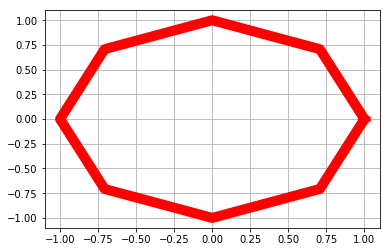

In [19]:
plotpts(p8)

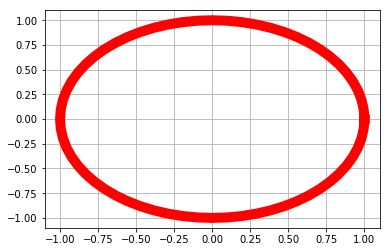

In [20]:
plotpts(p64)

In [21]:
# what about odd n?

p5 = circlePoints(5)
sumPoints(p5)

[0.0, 0.0]

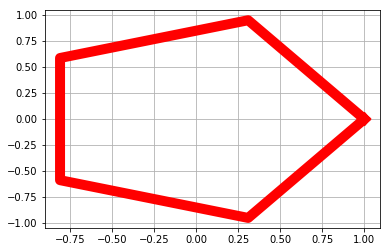

In [22]:
plotpts(p5)

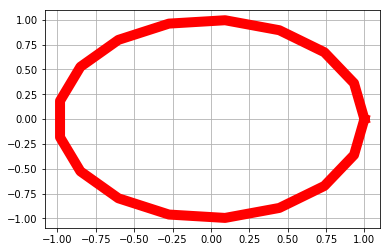

In [23]:
p17 = circlePoints(17)
plotpts(p17)

In [24]:
# it may seem surprising that odd n-gons also sum to [0,0]
# i know a complex way to prove this
# if you know a simple way - please tell me!!

sumPoints(circlePoints(63))

[0.0, 0.0]

# Approximate the area and circumference of a circle with n-gons
- define function perimeter, which gives the perimeter of an n-gon
- define function area, which gives the area of n-gon
    - can compute area by dividing n-gon into triangles
    - can find the area of each triangle by getting the base and height
- use euclid in both functions
- as n increases, the n-gon becomes more like a circle
- show that as n increases, area and perimeter values approach circle values

In [25]:
def perimeter(n):
    cp = circlePoints(n)
    # add the first point at the end 
    # so for loop will work
    cp.append(cp[0])
    total = 0
    for j in range(0, n):
        total += euclid(cp[j], cp[j+1])
    return total

def area(n):
    # break up n-gon into triangles around the center
    # find base and height of triganle, area = base*height/2
    cp = circlePoints(n)
    cp.append(cp[0])
    area = 0
    for j in range(n):
        x1,y1 = cp[j]
        x2,y2 = cp[j+1]
        xc = (x1+x2)/2
        yc = (y1+y2)/2
        height = euclid([xc,yc], [0,0])
        base = euclid(cp[j], cp[j+1])
        area += height * base/2
    return area


In [26]:
circlePoints(4)

[[1.0, 0.0],
 [6.123233995736766e-17, 1.0],
 [-1.0, 1.2246467991473532e-16],
 [-1.8369701987210297e-16, -1.0]]

In [27]:
area(4)

2.0

In [28]:
perimeter(4)

5.65685424949238

In [29]:
# area of circle

math.pi

3.141592653589793

In [30]:
def testArea():
    # see how we do for various n-gons
    for n in [3,4,5,8,14,20,30,50,100,1000,1000000]:
        print(area(n))

testArea()

1.299038105676658
2.0
2.377641290737884
2.8284271247461907
3.0371861738229065
3.0901699437494745
3.11867536226639
3.133330839107604
3.1395259764656673
3.1415719827794297
3.1415926535864336


In [31]:
# perimeter of circle

2*math.pi

6.283185307179586

In [32]:
def testPerimeter():
    for n in [3,4,5,8,14,20,30,50,100,1000,1000000]:
        print(perimeter(n))

testPerimeter()

5.196152422706632
5.65685424949238
5.877852522924732
6.122934917841436
6.2305861507768014
6.257378601609234
6.27170779605921
6.279051952931337
6.282151815625652
6.2831749717590775
6.283185307177944
